In [1]:
import os

In [3]:
os.getcwd()

'C:\\Users\\fazlu\\Working_space\\Jupyter_env\\class\\CNN'

In [4]:
ROOT = "'C:\\Users\\fazlu\\Working_space\\Jupyter_env\\class\\CNN'"

In [5]:
os.listdir()

['.git', '.ipynb_checkpoints', 'CNN.ipynb']

In [4]:
img_path = 'car1.jpeg'

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # image related ops
import numpy as np
import cv2 # opencv lib

In [6]:
car1 = mpimg.imread(img_path)

In [7]:
car1.shape

(168, 300, 3)

In [8]:
type(car1)

numpy.ndarray

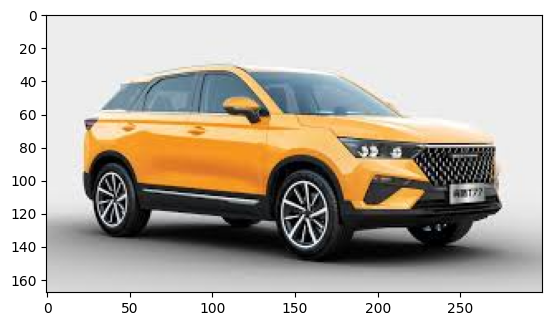

In [10]:
plt.imshow(car1)

In [11]:
car1[0]

array([[237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237, 237],
       [237, 237